## Task 

Task 1: Using the results of task 6 in the previous research question, engineer features to describe the changes in demographics from 2014 to 2019 in Hillsborough County, FL. (For example, a binary ">10% change from 2014" variable - use whatever features or buckets make the most sense to you. Get creative!)

- can't join on variable_code --> variable_code changes each year
- label is the only thing that can be trusted?? This code is based on the label of each variable

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

### Match 2014 and 2019 Datasets Based on Labels

In [78]:
# read in data

county = "hillsborough"
acs_dic = pd.read_csv('American Community Survey Data/acs5_variable_dict_2014_2019.csv')
data_2014_df = pd.read_csv(f"American Community Survey Data/{county}_acs5-2014_census.csv")
data_2014_df = data_2014_df.T.drop_duplicates().T
data_2019_df = pd.read_csv(f"American Community Survey Data/{county}_acs5-2019_census.csv")
data_2019_df = data_2019_df.T.drop_duplicates().T # a few duplicate columns

data_2014_df.head()

,index,DP02_0001E,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,DP02_0005PE,...,B25087_025E,B25087_026E,B25087_027E,B25087_028E,B25087_029E,B25088_001E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 111.03, Hillsborough County, Flor...",1268,1012,79.8,374,29.5,826,65.1,302,23.8,...,0,98,86,9,161,1452,17.9,22.3,11.5,12057011103
1,"Census Tract 114.08, Hillsborough County, Flor...",1078,811,75.2,332,30.8,692,64.2,288,26.7,...,0,20,37,8,77,1512,22.4,23.6,13.1,12057011408
2,"Census Tract 114.13, Hillsborough County, Flor...",2111,1444,68.4,704,33.3,1012,47.9,465,22,...,37,116,37,12,71,1476,23.3,26.6,14.8,12057011413
3,"Census Tract 116.08, Hillsborough County, Flor...",428,319,74.5,146,34.1,272,63.6,110,25.7,...,8,9,4,10,46,1603,21.2,21.5,19.2,12057011608
4,"Census Tract 116.11, Hillsborough County, Flor...",1596,990,62,438,27.4,609,38.2,241,15.1,...,20,92,37,46,17,1032,22.7,24.3,16.8,12057011611


In [79]:
data_2019_df.head()

,index,DP02_0001E,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,DP02_0005PE,...,B25087_035E,B25087_036E,B25087_037E,B25087_038E,B25087_039E,B25088_001E,B25092_001E,B25092_002E,B25092_003E,GEOID
0,"Census Tract 4.01, Hillsborough County, Florid...",926,294,31.7,124,13.4,96,10.4,18,1.9,...,0,0,0,0,0,991,19.9,26.3,9,12057000401
1,"Census Tract 101.05, Hillsborough County, Flor...",1496,921,61.6,325,21.7,78,5.2,52,3.5,...,0,0,0,0,10,866,17.3,23.3,9,12057010105
2,"Census Tract 102.03, Hillsborough County, Flor...",766,222,29,40,5.2,56,7.3,39,5.1,...,0,0,0,0,0,608,18.6,21.9,15.7,12057010203
3,"Census Tract 106, Hillsborough County, Florida...",1108,598,54,244,22,48,4.3,9,0.8,...,7,0,0,0,15,1241,14.2,16.9,9,12057010600
4,"Census Tract 23, Hillsborough County, Florida:...",1419,606,42.7,213,15,131,9.2,38,2.7,...,0,0,0,0,10,1174,17.8,18.7,14.2,12057002300


In [80]:
# rename each column to label for 2014 and 2019

labeled_codes_2014 = intersection(data_2014_df.columns, list(acs_dic[~acs_dic.label.isna()]['variable_code']))
labled_codes_2014_df = data_2014_df[['index']+labeled_codes_2014]

labled_columns_2014_df = labled_codes_2014_df
labled_columns_2014_df.columns = ['index'] + [acs_dic[(acs_dic["variable_code"]==x)&(acs_dic["acs_year"]==2014)]["label"].values[0] for x in labled_columns_2014_df.columns[1:]]


labeled_codes_2019 = intersection(data_2019_df.columns, list(acs_dic[~acs_dic.label.isna()]['variable_code']))
labled_codes_2019_df = data_2019_df[['index']+labeled_codes_2019]
labled_codes_2019_df = labled_codes_2019_df.loc[:,~labled_codes_2019_df.columns.duplicated()]

labled_columns_2019_df = labled_codes_2019_df
labled_columns_2019_df.columns = ['index'] + [acs_dic[(acs_dic["variable_code"]==x)&(acs_dic["acs_year"]==2019)]["label"].values[0] for x in labled_columns_2019_df.columns[1:]]

labled_columns_2014_df.shape, labled_columns_2019_df.shape

((321, 853), (321, 875))

In [81]:
cols_in_both = intersection(labled_columns_2014_df.columns, labled_columns_2019_df.columns)
len(cols_in_both)

524

In [82]:
labled_columns_2019_df.head(1)

,index,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family!!With own children of the householder under 18 years,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family!!With own children of the householder under 18 years,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children of the householder under 18 years,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Cohabiting couple household!!With own children of the householder under 18 years,...,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female","Percent!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
0,"Census Tract 4.01, Hillsborough County, Florid...",926,294,31.7,124,13.4,96,10.4,18,1.9,...,2.9,0,0,77,2.9,1825,881,48.3,944,51.7


In [96]:
# statisical signficance between variable with exact matching labels! 
## t test of means 
## income and unemployment important for housing
alpha = 0.05
statistically_signficant_codes = []


for col in cols_in_both:
    if col != "index":
        t = stats.ttest_rel(labled_columns_2014_df[col], labled_columns_2019_df[col])
        if t.pvalue < alpha:
            statistically_signficant_codes.append(col)
            
len(statistically_signficant_codes)

119

In [97]:
for code in statistically_signficant_codes:
    print(code)

Estimate!!HOUSEHOLDS BY TYPE!!Total households
Estimate!!RELATIONSHIP!!Population in households
Estimate!!RELATIONSHIP!!Population in households!!Spouse
Estimate!!RELATIONSHIP!!Population in households!!Other relatives
Estimate!!MARITAL STATUS!!Males 15 years and over
Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married
Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated
Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed
Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced
Estimate!!MARITAL STATUS!!Females 15 years and over
Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married
Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated
Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced
Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years
Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and o

In [98]:
alpha = 0.05
statistically_insignficant_codes = []


for col in cols_in_both:
    if col != "index":
        t = stats.ttest_rel(labled_columns_2014_df[col], labled_columns_2019_df[col])
        if t.pvalue > alpha:
            statistically_insignficant_codes.append(col)
            
len(statistically_insignficant_codes)

404

## Distribution Graphs

Estimate!!HOUSEHOLDS BY TYPE!!Total households
[[2014 'Estimate!!HOUSEHOLDS BY TYPE!!Total households' 'DP02_0001E']
 [2019 'Estimate!!HOUSEHOLDS BY TYPE!!Total households' 'DP02_0001E']]


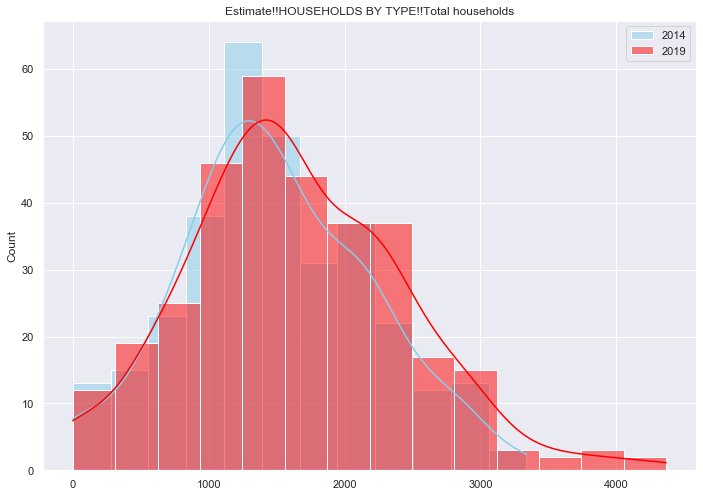

In [101]:
code = statistically_signficant_codes[0]
print(code)
print(acs_dic[acs_dic.label==code][['acs_year', 'label', 'variable_code']].values)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")

sns.histplot(x=list(labled_codes_2014_df[code]), color="skyblue", label="2014", kde=True)
sns.histplot(x=list(labled_codes_2019_df[code]), color="red", label="2019", kde=True)

plt.legend() 
plt.title(code)
plt.show()

Estimate!!HOUSEHOLDS BY TYPE!!Total households
[[2014 'Estimate!!HOUSEHOLDS BY TYPE!!Total households' 'DP02_0001E']
 [2019 'Estimate!!HOUSEHOLDS BY TYPE!!Total households' 'DP02_0001E']]


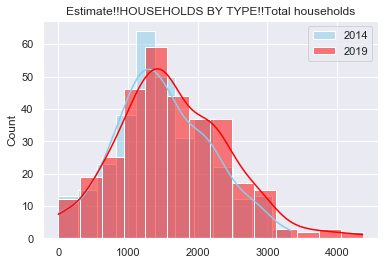

Estimate!!RELATIONSHIP!!Population in households
[[2014 'Estimate!!RELATIONSHIP!!Population in households' 'DP02_0017E']
 [2019 'Estimate!!RELATIONSHIP!!Population in households' 'DP02_0018E']]


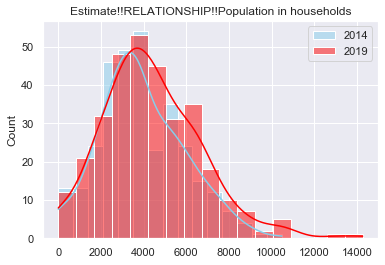

Estimate!!RELATIONSHIP!!Population in households!!Spouse
[[2014 'Estimate!!RELATIONSHIP!!Population in households!!Spouse'
  'DP02_0019E']
 [2019 'Estimate!!RELATIONSHIP!!Population in households!!Spouse'
  'DP02_0020E']]


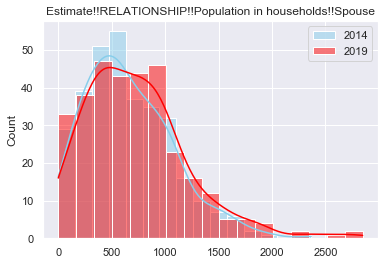

Estimate!!RELATIONSHIP!!Population in households!!Other relatives
[[2014
  'Estimate!!RELATIONSHIP!!Population in households!!Other relatives'
  'DP02_0021E']
 [2019
  'Estimate!!RELATIONSHIP!!Population in households!!Other relatives'
  'DP02_0023E']]


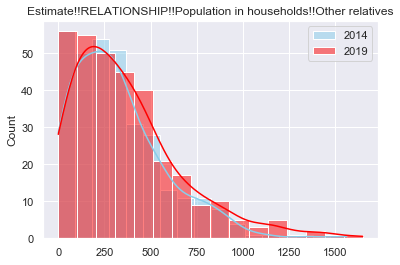

Estimate!!MARITAL STATUS!!Males 15 years and over
[[2014 'Estimate!!MARITAL STATUS!!Males 15 years and over' 'DP02_0024E']
 [2019 'Estimate!!MARITAL STATUS!!Males 15 years and over' 'DP02_0025E']]


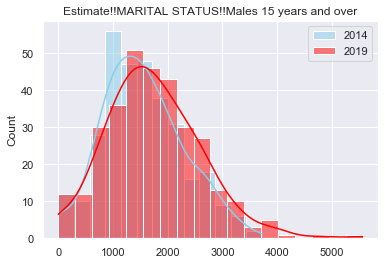

Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married
[[2014 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married'
  'DP02_0025E']
 [2019 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Never married'
  'DP02_0026E']]


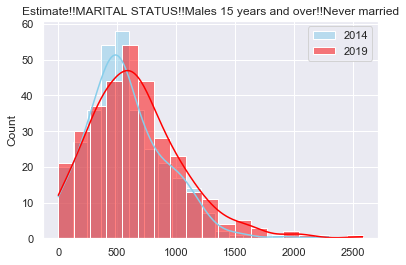

Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated
[[2014
  'Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated'
  'DP02_0026E']
 [2019
  'Estimate!!MARITAL STATUS!!Males 15 years and over!!Now married, except separated'
  'DP02_0027E']]


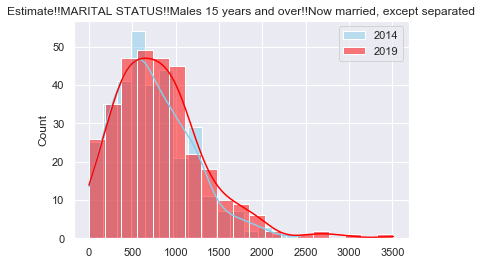

Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed
[[2014 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed'
  'DP02_0028E']
 [2019 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Widowed'
  'DP02_0029E']]


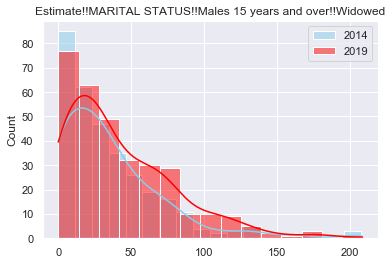

Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced
[[2014 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced'
  'DP02_0029E']
 [2019 'Estimate!!MARITAL STATUS!!Males 15 years and over!!Divorced'
  'DP02_0030E']]


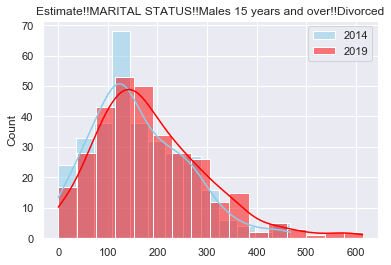

Estimate!!MARITAL STATUS!!Females 15 years and over
[[2014 'Estimate!!MARITAL STATUS!!Females 15 years and over' 'DP02_0030E']
 [2019 'Estimate!!MARITAL STATUS!!Females 15 years and over' 'DP02_0031E']]


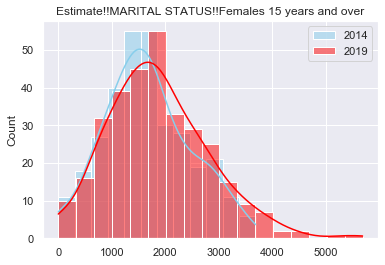

Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married
[[2014
  'Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married'
  'DP02_0031E']
 [2019
  'Estimate!!MARITAL STATUS!!Females 15 years and over!!Never married'
  'DP02_0032E']]


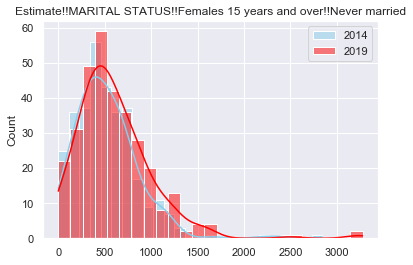

Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated
[[2014
  'Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated'
  'DP02_0032E']
 [2019
  'Estimate!!MARITAL STATUS!!Females 15 years and over!!Now married, except separated'
  'DP02_0033E']]


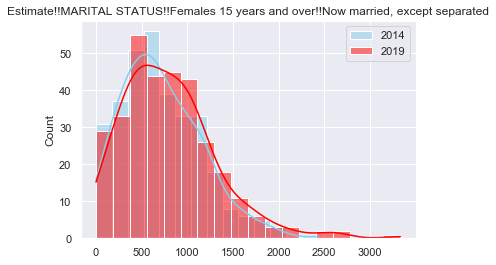

Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced
[[2014 'Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced'
  'DP02_0035E']
 [2019 'Estimate!!MARITAL STATUS!!Females 15 years and over!!Divorced'
  'DP02_0036E']]


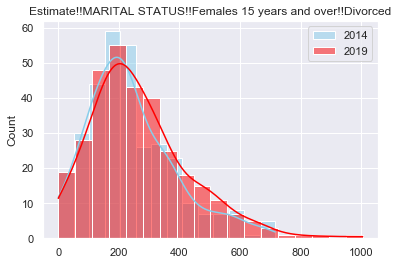

Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years
[[2014
  'Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years'
  'DP02_0046E']
 [2019
  'Estimate!!GRANDPARENTS!!Number of grandparents living with own grandchildren under 18 years!!Years responsible for grandchildren!!1 or 2 years'
  'DP02_0047E']]


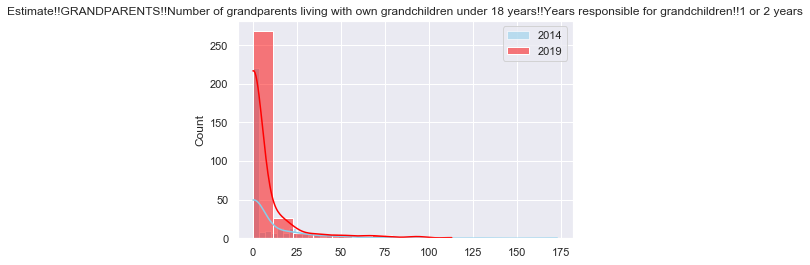

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over
[[2014 'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over'
  'DP02_0058E']
 [2019 'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over'
  'DP02_0059E']]


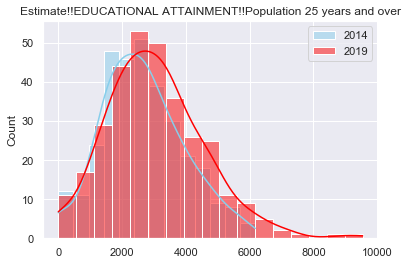

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)
[[2014
  'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'
  'DP02_0061E']
 [2019
  'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'
  'DP02_0062E']]


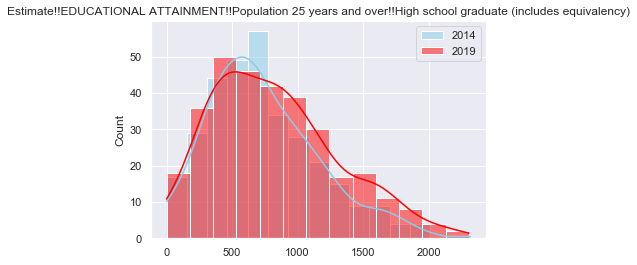

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree
[[2014
  "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"
  'DP02_0063E']
 [2019
  "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"
  'DP02_0064E']]


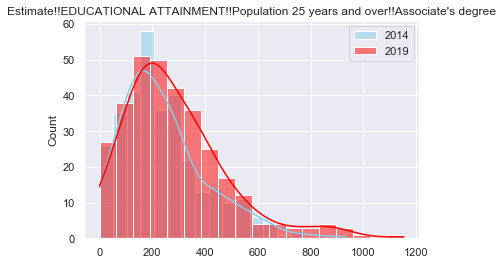

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree
[[2014
  "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"
  'DP02_0064E']
 [2019
  "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"
  'DP02_0065E']]


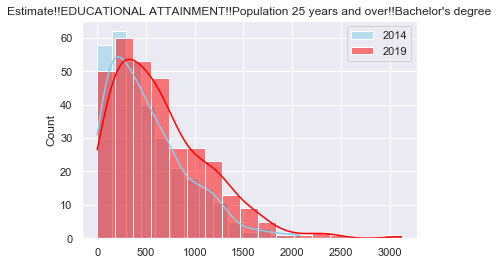

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree
[[2014
  'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree'
  'DP02_0065E']
 [2019
  'Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree'
  'DP02_0066E']]


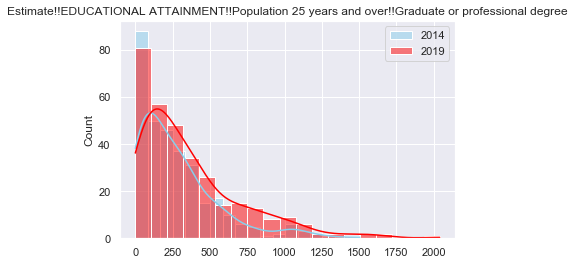

Estimate!!VETERAN STATUS!!Civilian population 18 years and over
[[2014 'Estimate!!VETERAN STATUS!!Civilian population 18 years and over'
  'DP02_0068E']
 [2019 'Estimate!!VETERAN STATUS!!Civilian population 18 years and over'
  'DP02_0069E']]


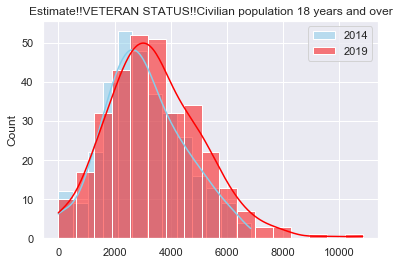

Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population
[[2014
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population'
  'DP02_0070E']
 [2019
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population'
  'DP02_0071E']]


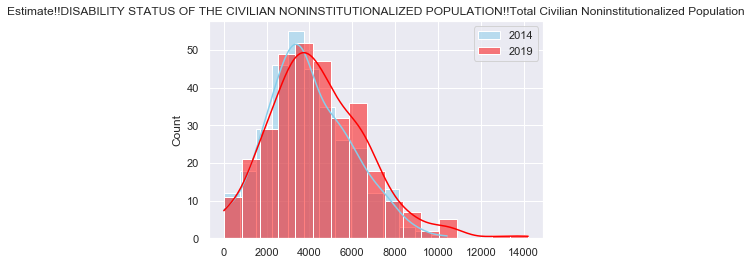

Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability
[[2014
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability'
  'DP02_0071E']
 [2019
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Total Civilian Noninstitutionalized Population!!With a disability'
  'DP02_0072E']]


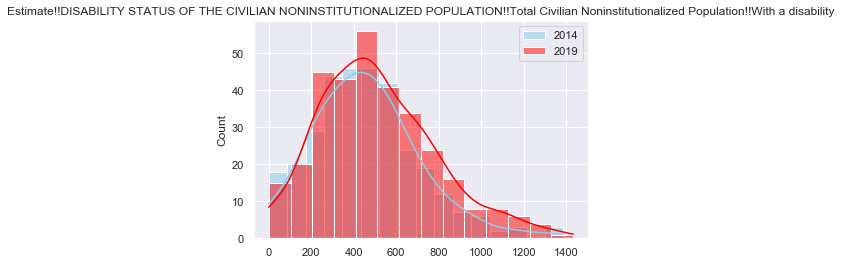

Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years
[[2014
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years'
  'DP02_0074E']
 [2019
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!18 to 64 years'
  'DP02_0075E']]


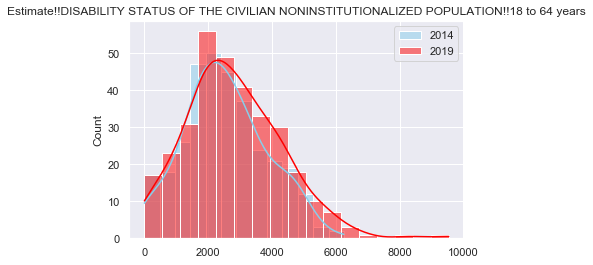

Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over
[[2014
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over'
  'DP02_0076E']
 [2019
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over'
  'DP02_0077E']]


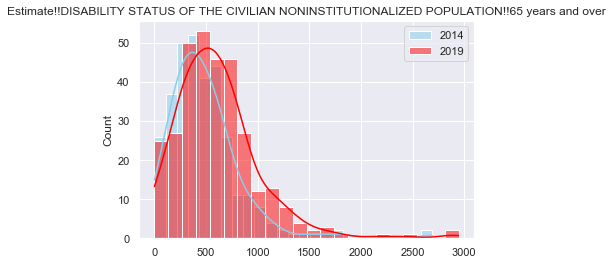

Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability
[[2014
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability'
  'DP02_0077E']
 [2019
  'Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!65 years and over!!With a disability'
  'DP02_0078E']]


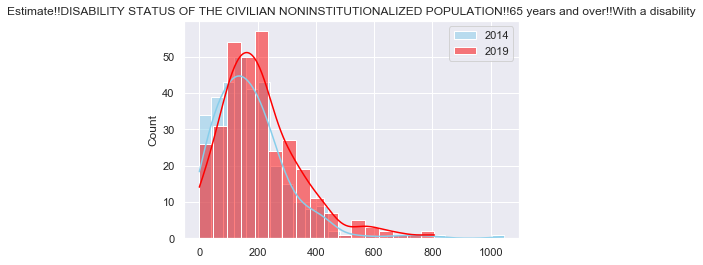

Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over
[[2014 'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over'
  'DP02_0078E']
 [2019 'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over'
  'DP02_0079E']]


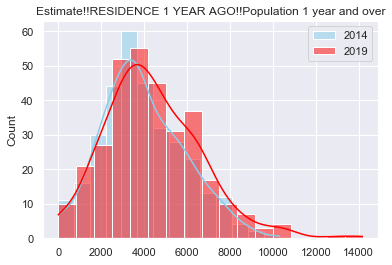

Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house
[[2014
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house'
  'DP02_0079E']
 [2019
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Same house'
  'DP02_0080E']]


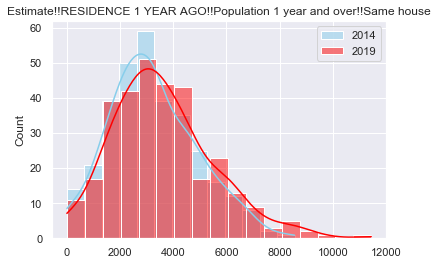

Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county
[[2014
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county'
  'DP02_0082E']
 [2019
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county'
  'DP02_0083E']]


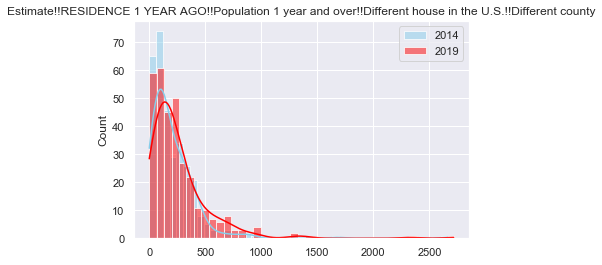

Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state
[[2014
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state'
  'DP02_0084E']
 [2019
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Different house in the U.S.!!Different county!!Different state'
  'DP02_0085E']]


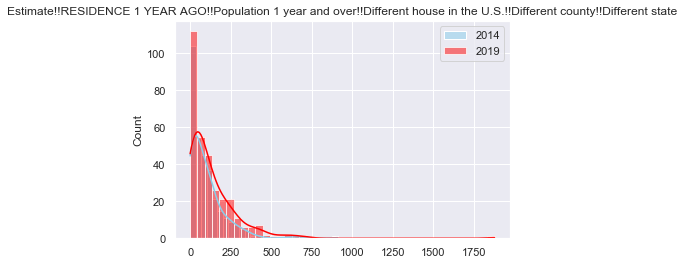

Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad
[[2014
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad'
  'DP02_0085E']
 [2019
  'Estimate!!RESIDENCE 1 YEAR AGO!!Population 1 year and over!!Abroad'
  'DP02_0086E']]


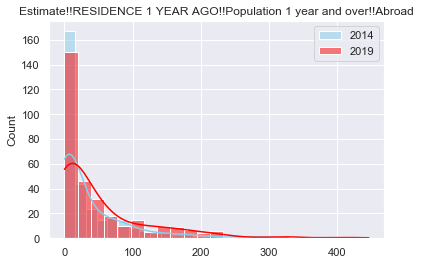

Estimate!!PLACE OF BIRTH!!Total population
[[2014 'Estimate!!PLACE OF BIRTH!!Total population' 'DP02_0086E']
 [2019 'Estimate!!PLACE OF BIRTH!!Total population' 'DP02_0087E']]


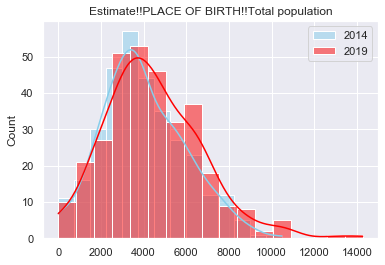

Estimate!!PLACE OF BIRTH!!Total population!!Native
[[2014 'Estimate!!PLACE OF BIRTH!!Total population!!Native' 'DP02_0087E']
 [2019 'Estimate!!PLACE OF BIRTH!!Total population!!Native' 'DP02_0088E']]


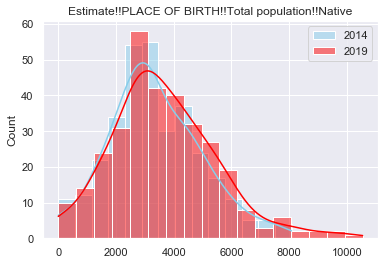

Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence
[[2014
  'Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence'
  'DP02_0089E']
 [2019
  'Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in United States!!State of residence'
  'DP02_0090E']]


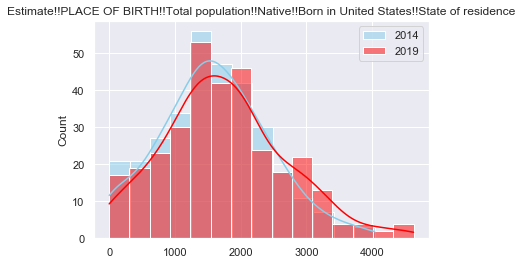

Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)
[[2014
  'Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)'
  'DP02_0091E']
 [2019
  'Estimate!!PLACE OF BIRTH!!Total population!!Native!!Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)'
  'DP02_0092E']]


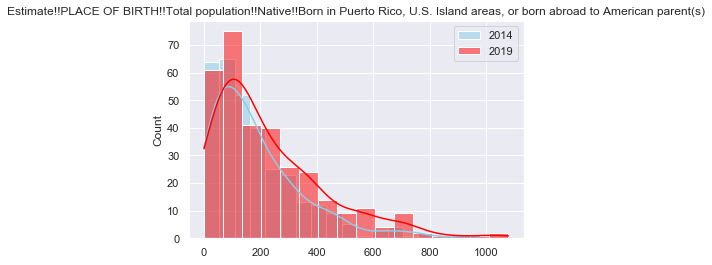

Estimate!!PLACE OF BIRTH!!Total population!!Foreign born
[[2014 'Estimate!!PLACE OF BIRTH!!Total population!!Foreign born'
  'DP02_0092E']
 [2019 'Estimate!!PLACE OF BIRTH!!Total population!!Foreign born'
  'DP02_0093E']]


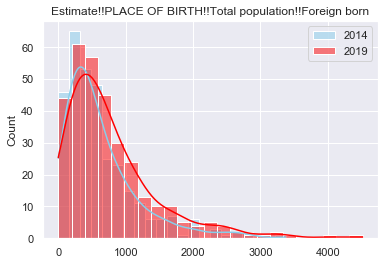

Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen
[[2014
  'Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen'
  'DP02_0094E']
 [2019
  'Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Naturalized U.S. citizen'
  'DP02_0095E']]


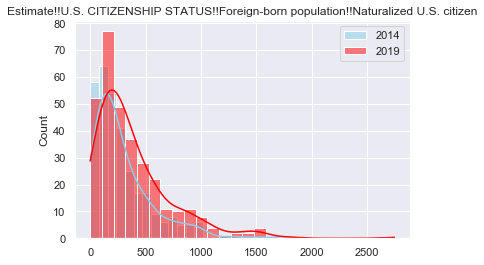

Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen
[[2014
  'Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen'
  'DP02_0095E']
 [2019
  'Estimate!!U.S. CITIZENSHIP STATUS!!Foreign-born population!!Not a U.S. citizen'
  'DP02_0096E']]


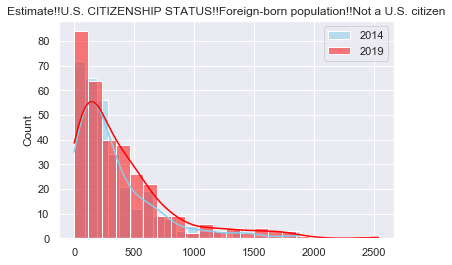

Estimate!!YEAR OF ENTRY!!Population born outside the United States
[[2014
  'Estimate!!YEAR OF ENTRY!!Population born outside the United States'
  'DP02_0096E']
 [2019
  'Estimate!!YEAR OF ENTRY!!Population born outside the United States'
  'DP02_0097E']]


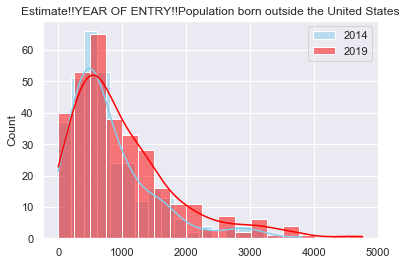

Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia
[[2014
  'Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia'
  'DP02_0105E']
 [2019
  'Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Asia'
  'DP02_0106E']]


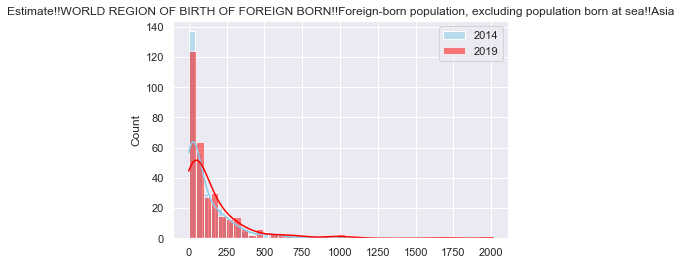

Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America
[[2014
  'Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America'
  'DP02_0108E']
 [2019
  'Estimate!!WORLD REGION OF BIRTH OF FOREIGN BORN!!Foreign-born population, excluding population born at sea!!Latin America'
  'DP02_0109E']]


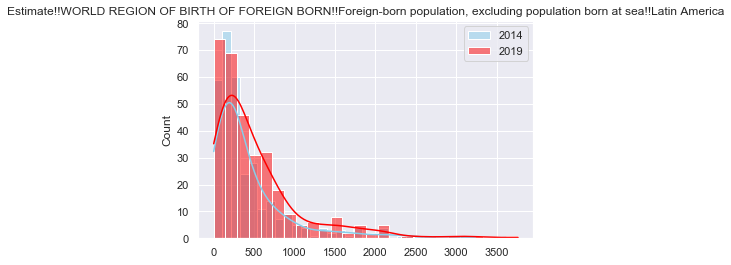

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over
[[2014 'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over'
  'DP02_0110E']
 [2019 'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over'
  'DP02_0111E']]


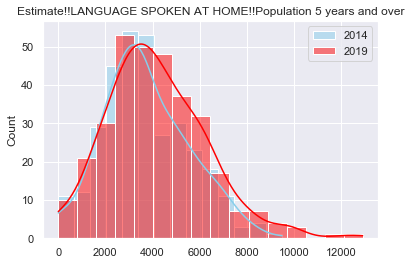

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English
[[2014
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English'
  'DP02_0112E']
 [2019
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English'
  'DP02_0113E']]


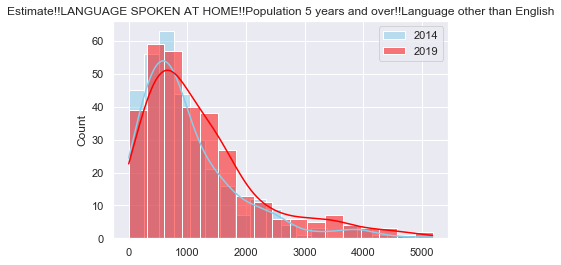

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English!!Speak English less than "very well"
[[2014
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English!!Speak English less than "very well"'
  'DP02_0113E']
 [2019
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Language other than English!!Speak English less than "very well"'
  'DP02_0114E']]


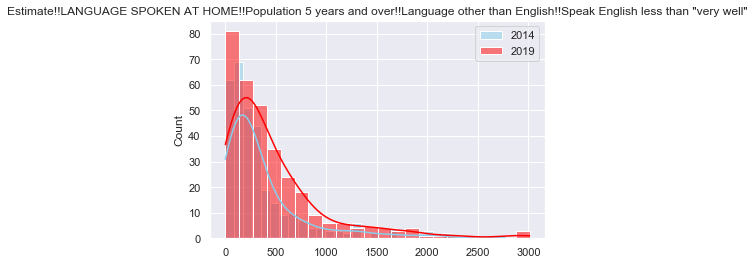

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish
[[2014
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish'
  'DP02_0114E']
 [2019
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish'
  'DP02_0115E']]


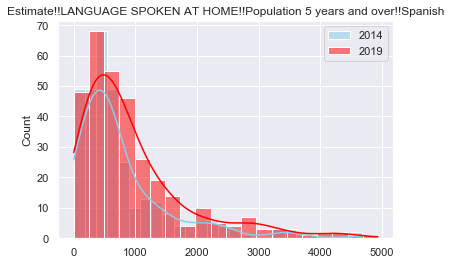

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish!!Speak English less than "very well"
[[2014
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish!!Speak English less than "very well"'
  'DP02_0115E']
 [2019
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Spanish!!Speak English less than "very well"'
  'DP02_0116E']]


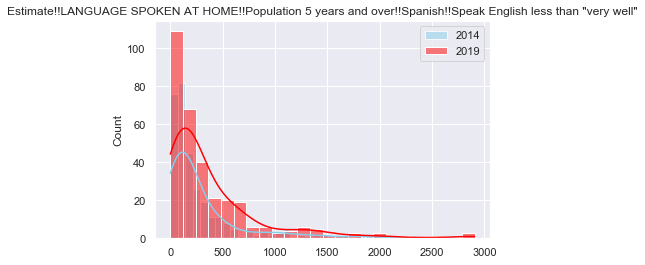

Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Other Indo-European languages!!Speak English less than "very well"
[[2014
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Other Indo-European languages!!Speak English less than "very well"'
  'DP02_0117E']
 [2019
  'Estimate!!LANGUAGE SPOKEN AT HOME!!Population 5 years and over!!Other Indo-European languages!!Speak English less than "very well"'
  'DP02_0118E']]


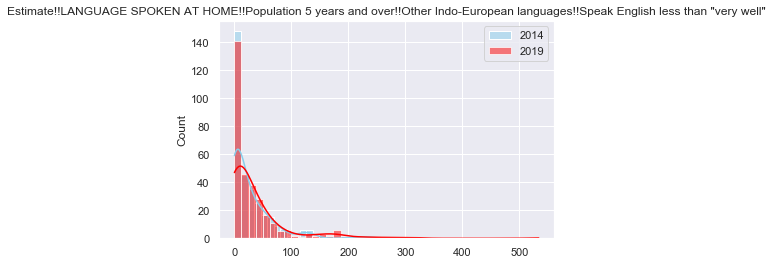

Estimate!!ANCESTRY!!Total population!!Hungarian
[[2014 'Estimate!!ANCESTRY!!Total population!!Hungarian' 'DP02_0133E']
 [2019 'Estimate!!ANCESTRY!!Total population!!Hungarian' 'DP02_0134E']]


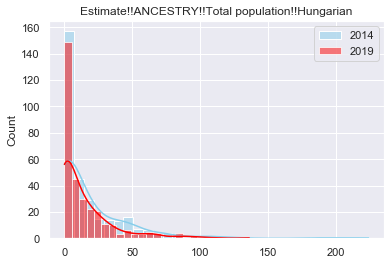

Estimate!!ANCESTRY!!Total population!!Polish
[[2014 'Estimate!!ANCESTRY!!Total population!!Polish' 'DP02_0138E']
 [2019 'Estimate!!ANCESTRY!!Total population!!Polish' 'DP02_0139E']]


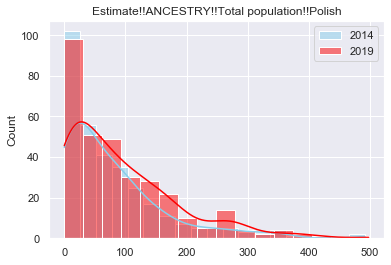

Estimate!!ANCESTRY!!Total population!!Subsaharan African
[[2014 'Estimate!!ANCESTRY!!Total population!!Subsaharan African'
  'DP02_0144E']
 [2019 'Estimate!!ANCESTRY!!Total population!!Subsaharan African'
  'DP02_0145E']]


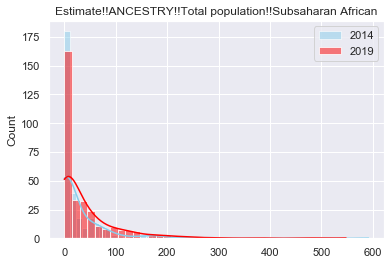

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over
[[2014 'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over'
  'DP03_0001E']
 [2019 'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over'
  'DP03_0001E']]


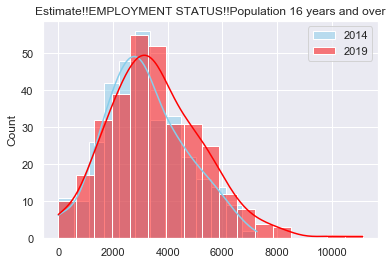

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force'
  'DP03_0002E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force'
  'DP03_0002E']]


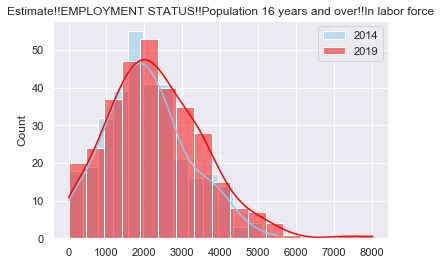

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force'
  'DP03_0003E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force'
  'DP03_0003E']]


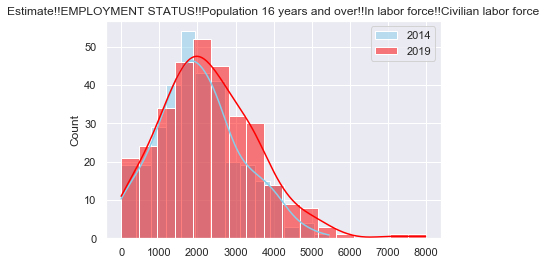

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed'
  'DP03_0004E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed'
  'DP03_0004E']]


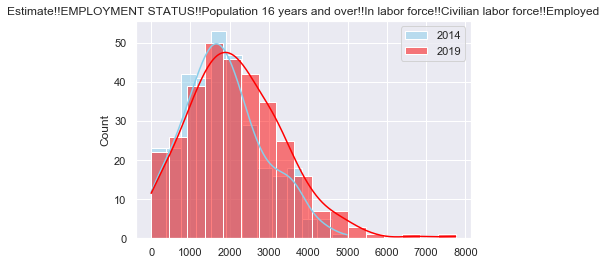

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed'
  'DP03_0005E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed'
  'DP03_0005E']]


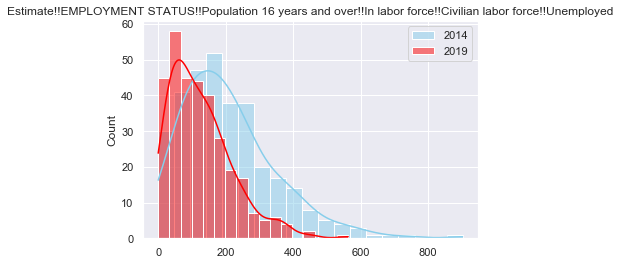

Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force'
  'DP03_0007E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force'
  'DP03_0007E']]


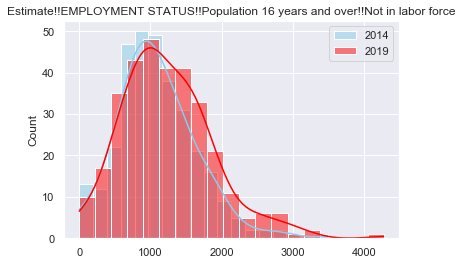

Estimate!!EMPLOYMENT STATUS!!Females 16 years and over
[[2014 'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over'
  'DP03_0010E']
 [2019 'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over'
  'DP03_0010E']]


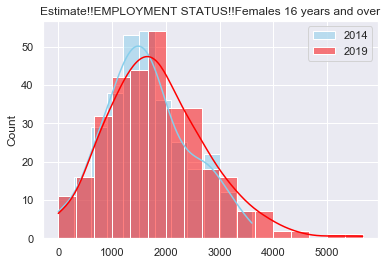

Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force'
  'DP03_0011E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force'
  'DP03_0011E']]


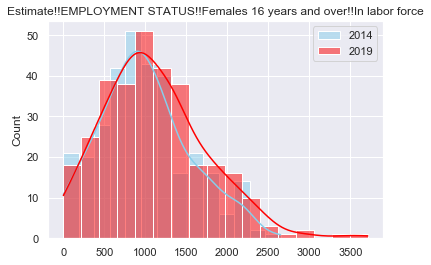

Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force'
  'DP03_0012E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force'
  'DP03_0012E']]


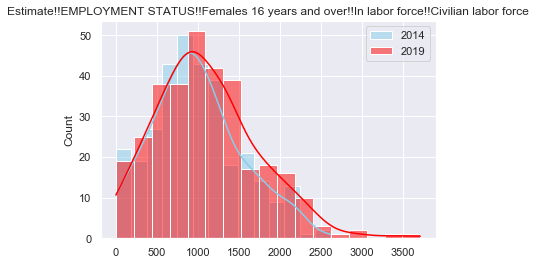

Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed
[[2014
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed'
  'DP03_0013E']
 [2019
  'Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed'
  'DP03_0013E']]


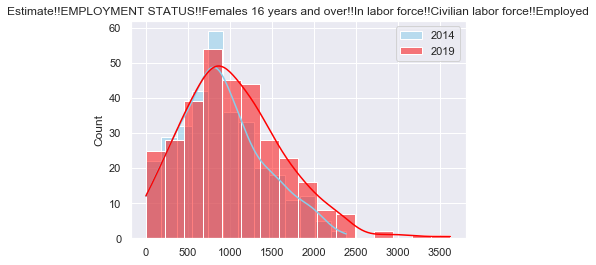

Estimate!!COMMUTING TO WORK!!Workers 16 years and over
[[2014 'Estimate!!COMMUTING TO WORK!!Workers 16 years and over'
  'DP03_0018E']
 [2019 'Estimate!!COMMUTING TO WORK!!Workers 16 years and over'
  'DP03_0018E']]


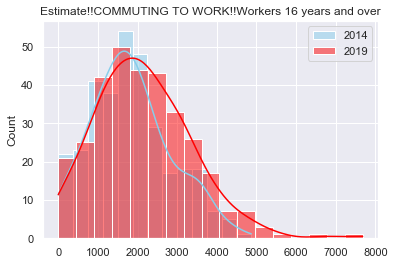

Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone
[[2014
  'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone'
  'DP03_0019E']
 [2019
  'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- drove alone'
  'DP03_0019E']]


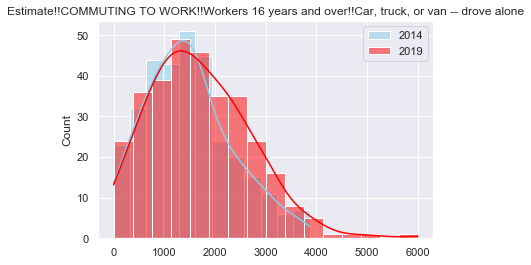

Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled
[[2014
  'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled'
  'DP03_0020E']
 [2019
  'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled'
  'DP03_0020E']]


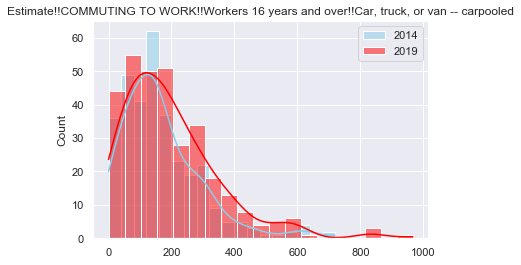

Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations
[[2014
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations'
  'DP03_0027E']
 [2019
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations'
  'DP03_0027E']]


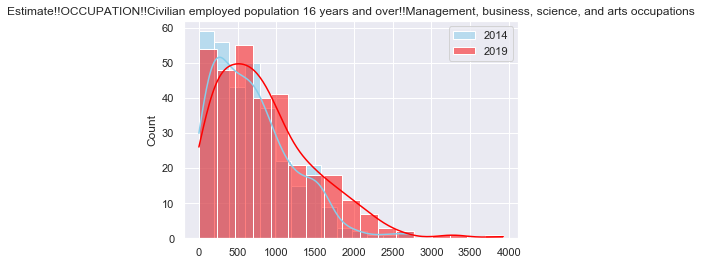

Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations
[[2014
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations'
  'DP03_0028E']
 [2019
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations'
  'DP03_0028E']]


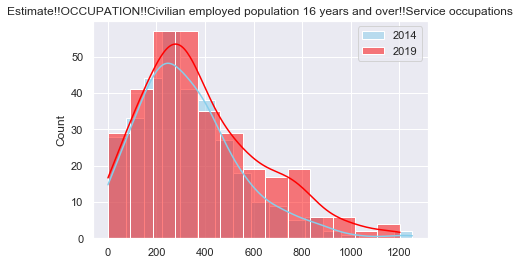

Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations
[[2014
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations'
  'DP03_0030E']
 [2019
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations'
  'DP03_0030E']]


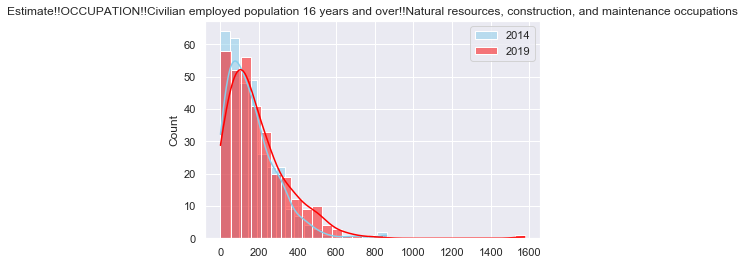

Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations
[[2014
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations'
  'DP03_0031E']
 [2019
  'Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations'
  'DP03_0031E']]


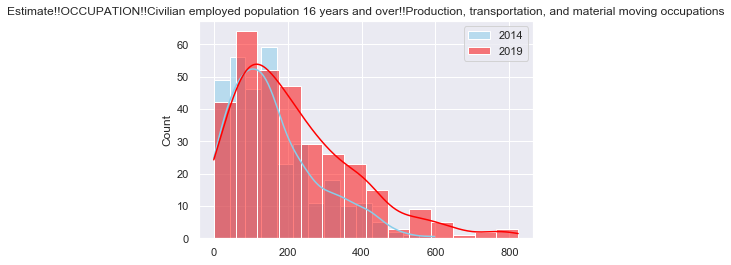

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction'
  'DP03_0034E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Construction'
  'DP03_0034E']]


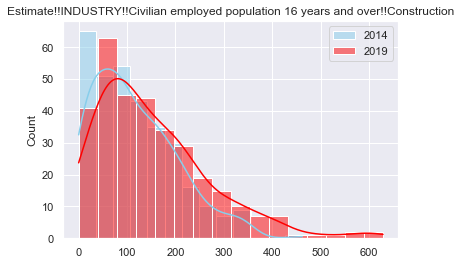

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade'
  'DP03_0037E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Retail trade'
  'DP03_0037E']]


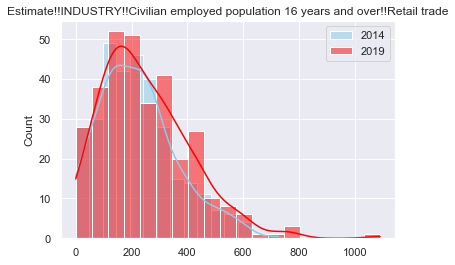

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities'
  'DP03_0038E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities'
  'DP03_0038E']]


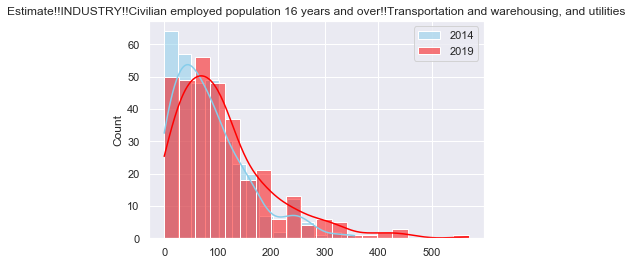

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing'
  'DP03_0040E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing'
  'DP03_0040E']]


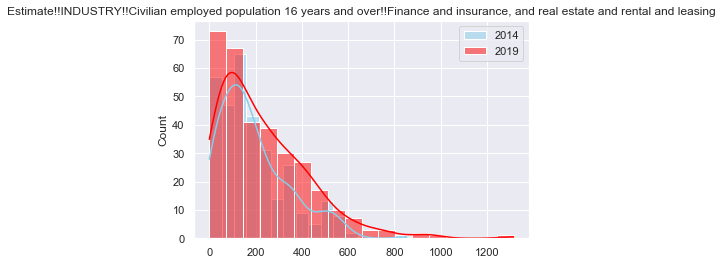

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services'
  'DP03_0041E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services'
  'DP03_0041E']]


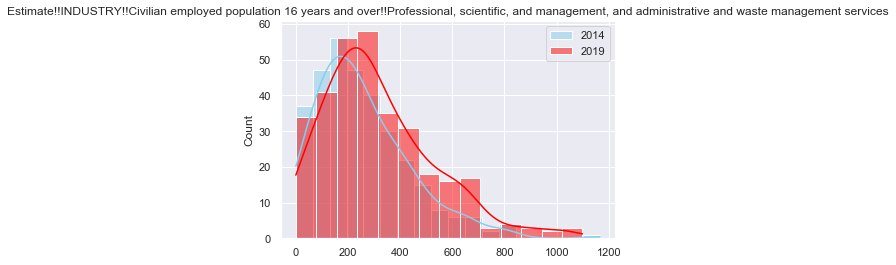

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance'
  'DP03_0042E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Educational services, and health care and social assistance'
  'DP03_0042E']]


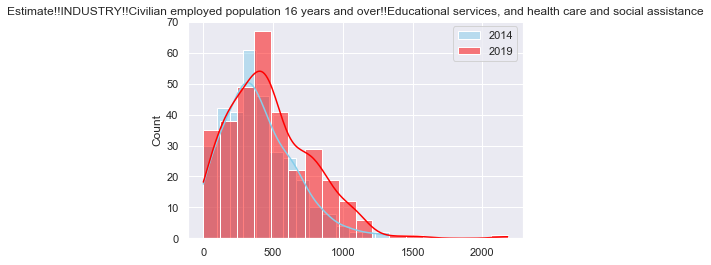

Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services
[[2014
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services'
  'DP03_0043E']
 [2019
  'Estimate!!INDUSTRY!!Civilian employed population 16 years and over!!Arts, entertainment, and recreation, and accommodation and food services'
  'DP03_0043E']]


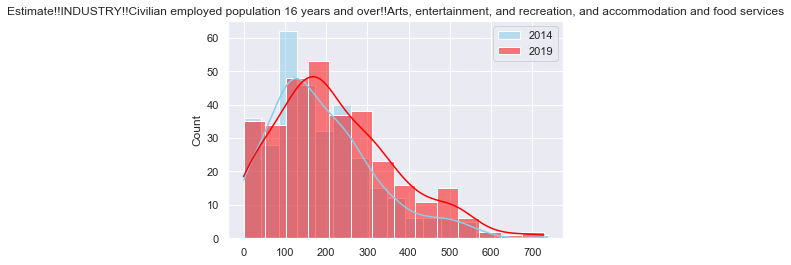

Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers
[[2014
  'Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers'
  'DP03_0047E']
 [2019
  'Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Private wage and salary workers'
  'DP03_0047E']]


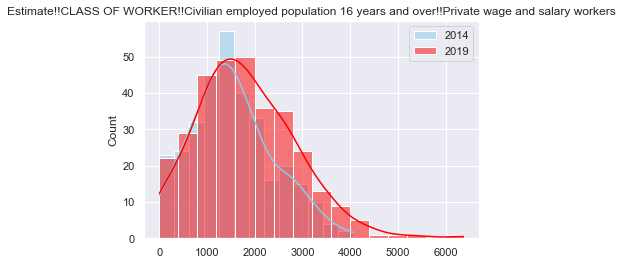

Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers
[[2014
  'Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers'
  'DP03_0049E']
 [2019
  'Estimate!!CLASS OF WORKER!!Civilian employed population 16 years and over!!Self-employed in own not incorporated business workers'
  'DP03_0049E']]


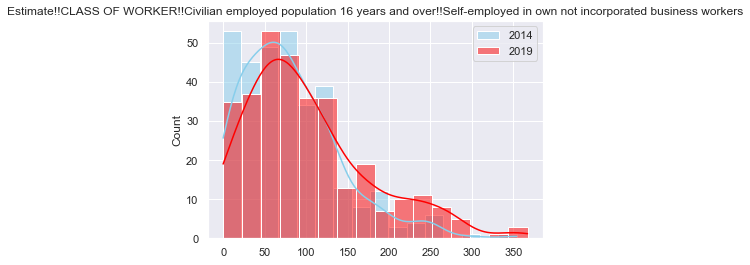

Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage
[[2014
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage'
  'DP03_0096E']
 [2019
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage'
  'DP03_0096E']]


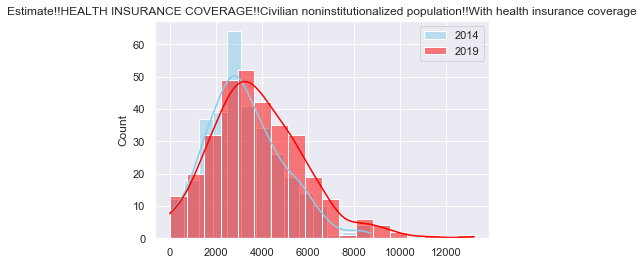

Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance
[[2014
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance'
  'DP03_0097E']
 [2019
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance'
  'DP03_0097E']]


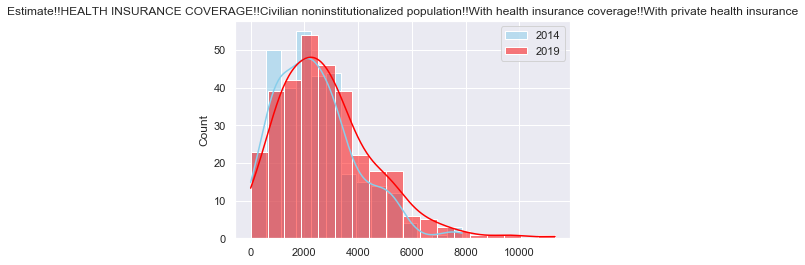

Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage
[[2014
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage'
  'DP03_0098E']
 [2019
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage'
  'DP03_0098E']]


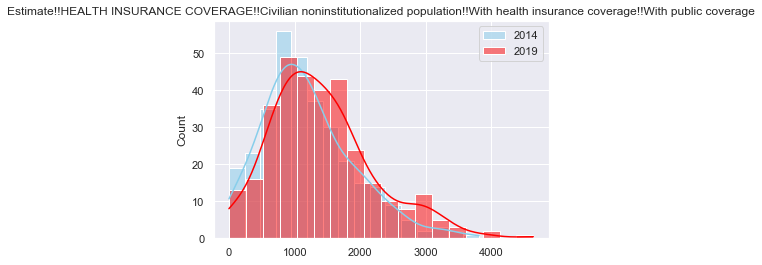

Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage
[[2014
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage'
  'DP03_0099E']
 [2019
  'Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage'
  'DP03_0099E']]


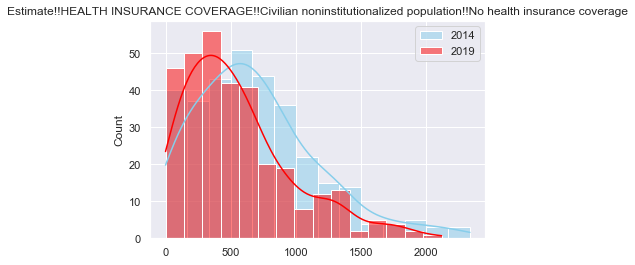

Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
[[2014
  'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units'
  'DP04_0003E']
 [2019
  'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units'
  'DP04_0003E']]


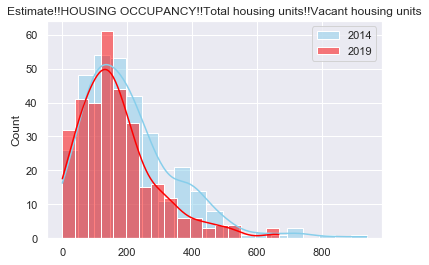

Estimate!!ROOMS!!Total housing units!!8 rooms
[[2014 'Estimate!!ROOMS!!Total housing units!!8 rooms' 'DP04_0034E']
 [2019 'Estimate!!ROOMS!!Total housing units!!8 rooms' 'DP04_0035E']]


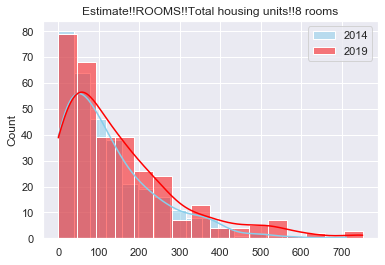

Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009
[[2014
  'Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009'
  'DP04_0051E']
 [2019
  'Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 2000 to 2009'
  'DP04_0054E']]


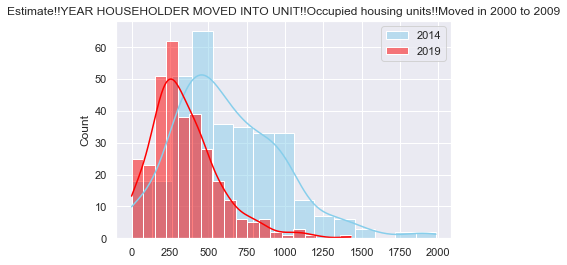

Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999
[[2014
  'Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999'
  'DP04_0052E']
 [2019
  'Estimate!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units!!Moved in 1990 to 1999'
  'DP04_0055E']]


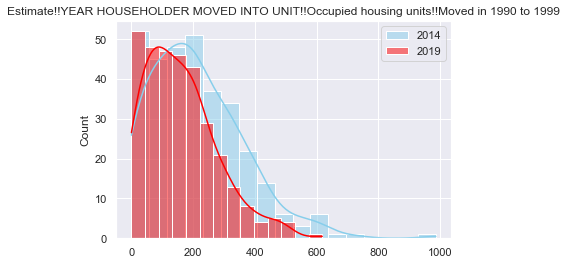

Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available
[[2014
  'Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available'
  'DP04_0059E']
 [2019
  'Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!2 vehicles available'
  'DP04_0060E']]


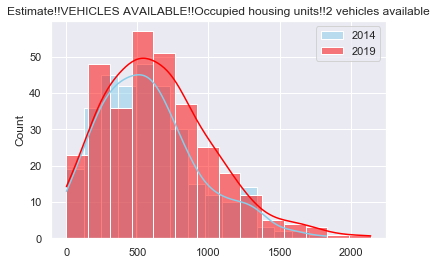

Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available
[[2014
  'Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available'
  'DP04_0060E']
 [2019
  'Estimate!!VEHICLES AVAILABLE!!Occupied housing units!!3 or more vehicles available'
  'DP04_0061E']]


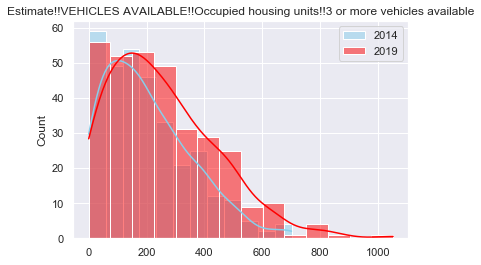

Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity
[[2014
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity'
  'DP04_0064E']
 [2019
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Electricity'
  'DP04_0065E']]


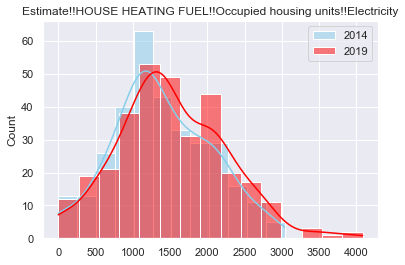

Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.
[[2014
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.'
  'DP04_0065E']
 [2019
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Fuel oil, kerosene, etc.'
  'DP04_0066E']]


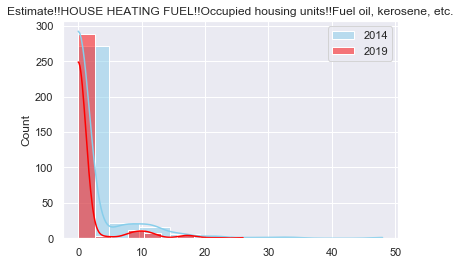

Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy
[[2014
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy'
  'DP04_0068E']
 [2019
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!Solar energy'
  'DP04_0069E']]


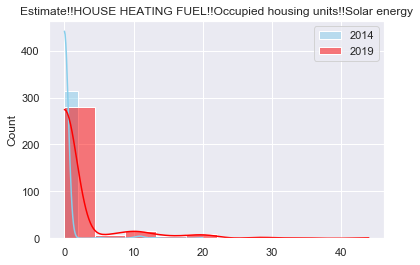

Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used
[[2014
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used'
  'DP04_0070E']
 [2019
  'Estimate!!HOUSE HEATING FUEL!!Occupied housing units!!No fuel used'
  'DP04_0071E']]


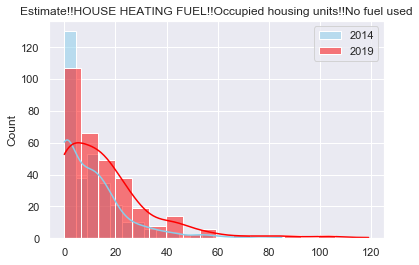

Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities
[[2014
  'Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities'
  'DP04_0073E']
 [2019
  'Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!Lacking complete kitchen facilities'
  'DP04_0074E']]


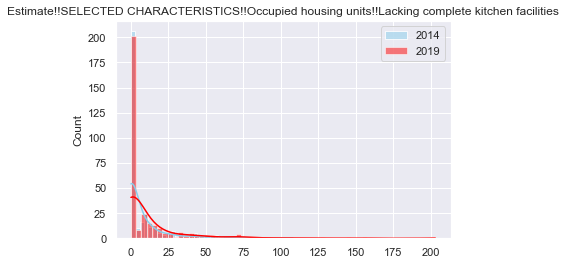

Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available
[[2014
  'Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available'
  'DP04_0074E']
 [2019
  'Estimate!!SELECTED CHARACTERISTICS!!Occupied housing units!!No telephone service available'
  'DP04_0075E']]


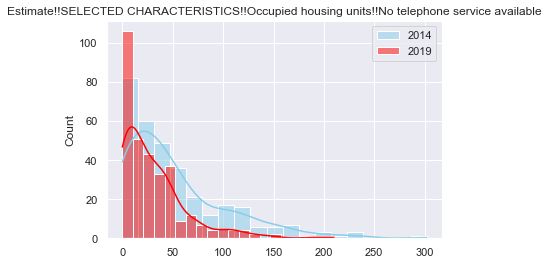

Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less
[[2014
  'Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less'
  'DP04_0076E']
 [2019
  'Estimate!!OCCUPANTS PER ROOM!!Occupied housing units!!1.00 or less'
  'DP04_0077E']]


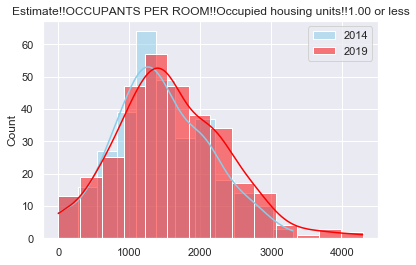

Estimate!!VALUE!!Owner-occupied units!!Less than $50,000
[[2014 'Estimate!!VALUE!!Owner-occupied units!!Less than $50,000'
  'DP04_0080E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!Less than $50,000'
  'DP04_0081E']]


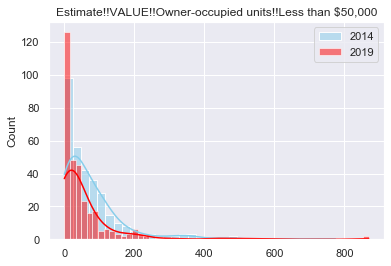

Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999
[[2014 'Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999'
  'DP04_0081E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!$50,000 to $99,999'
  'DP04_0082E']]


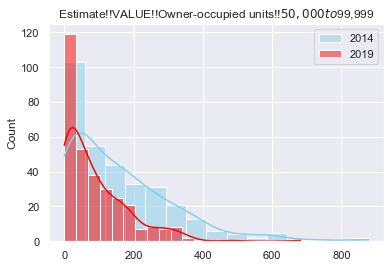

Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999
[[2014 'Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999'
  'DP04_0082E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!$100,000 to $149,999'
  'DP04_0083E']]


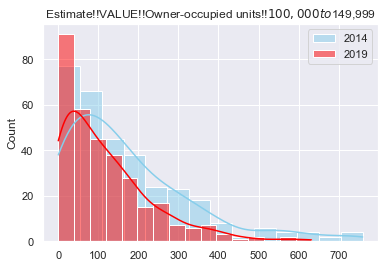

Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999
[[2014 'Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999'
  'DP04_0084E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!$200,000 to $299,999'
  'DP04_0085E']]


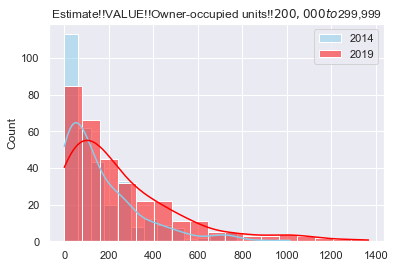

Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999
[[2014 'Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999'
  'DP04_0085E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!$300,000 to $499,999'
  'DP04_0086E']]


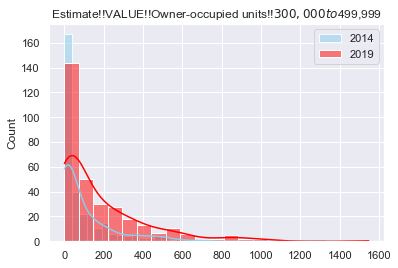

Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999
[[2014 'Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999'
  'DP04_0086E']
 [2019 'Estimate!!VALUE!!Owner-occupied units!!$500,000 to $999,999'
  'DP04_0087E']]


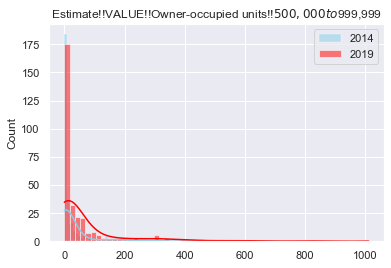

Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage
[[2014
  'Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage'
  'DP04_0091E']
 [2019
  'Estimate!!MORTGAGE STATUS!!Owner-occupied units!!Housing units without a mortgage'
  'DP04_0092E']]


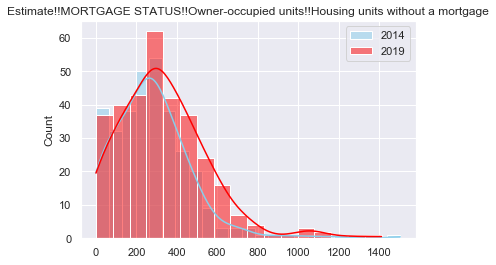

Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent
[[2014
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent'
  'DP04_0109E']
 [2019
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 20.0 percent'
  'DP04_0111E']]


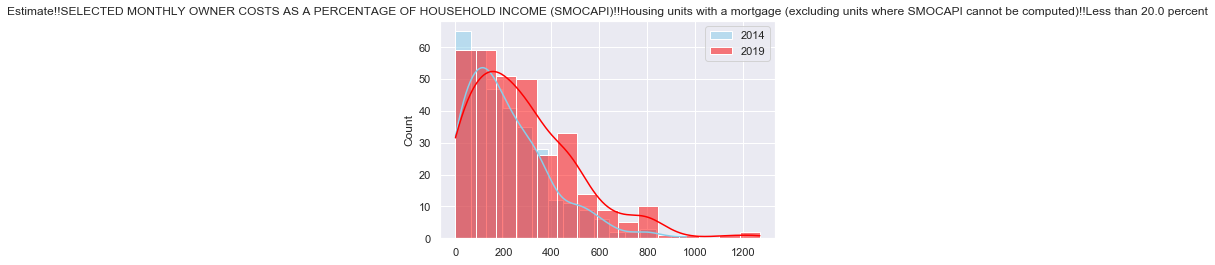

Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more
[[2014
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more'
  'DP04_0113E']
 [2019
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)!!35.0 percent or more'
  'DP04_0115E']]


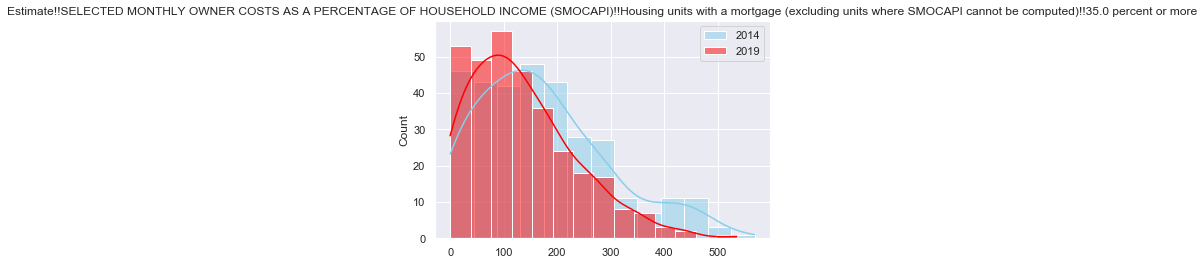

Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)
[[2014
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)'
  'DP04_0115E']
 [2019
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)'
  'DP04_0117E']]


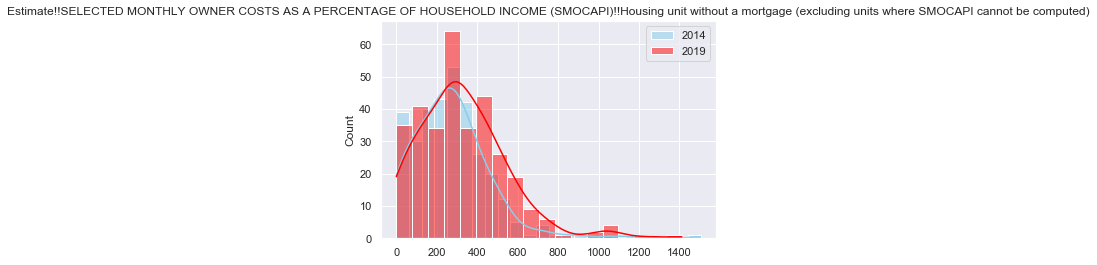

Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent
[[2014
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent'
  'DP04_0116E']
 [2019
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!Less than 10.0 percent'
  'DP04_0118E']]


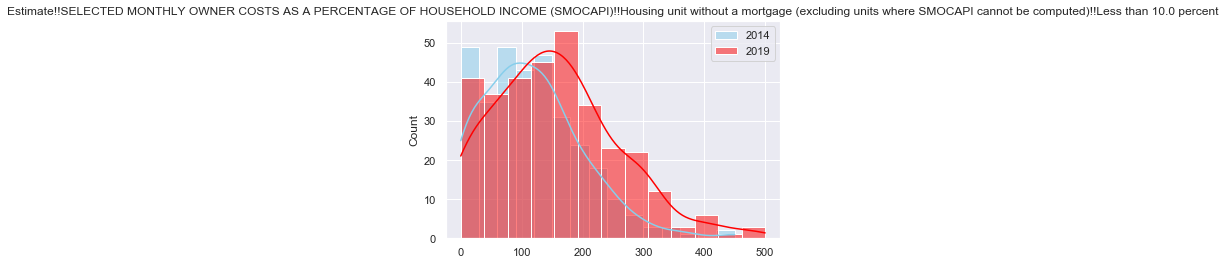

Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent
[[2014
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent'
  'DP04_0117E']
 [2019
  'Estimate!!SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)!!Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)!!10.0 to 14.9 percent'
  'DP04_0119E']]


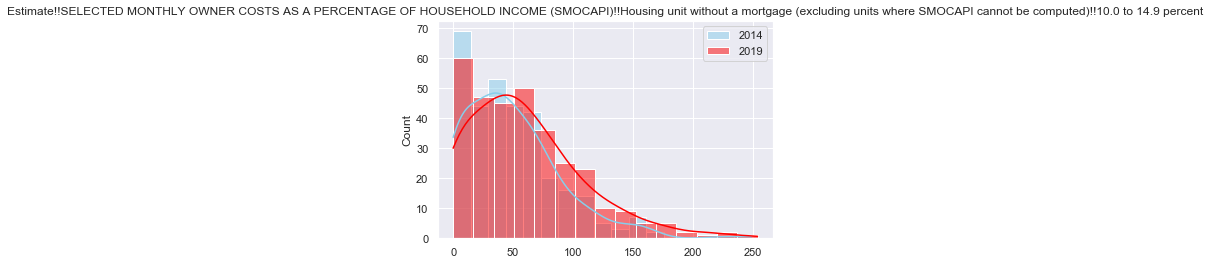

Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499
[[2014
  'Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499'
  'DP04_0130E']
 [2019
  'Estimate!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499'
  'DP04_0129E']]


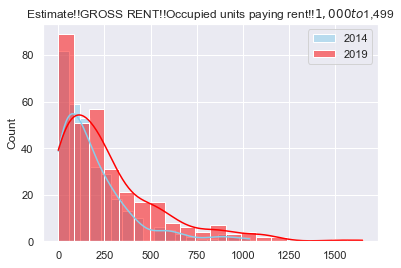

Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent
[[2014
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent'
  'DP04_0135E']
 [2019
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!Less than 15.0 percent'
  'DP04_0137E']]


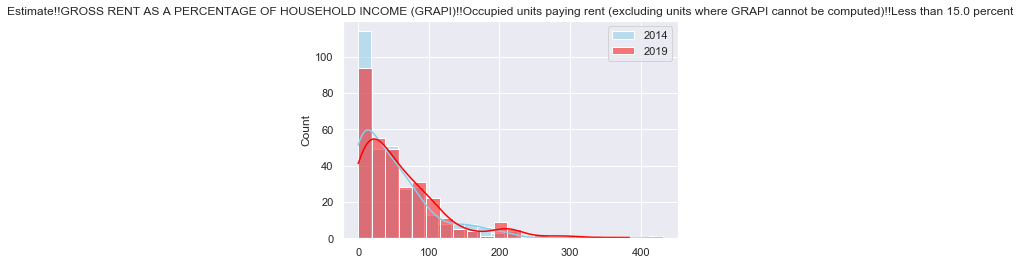

Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent
[[2014
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent'
  'DP04_0136E']
 [2019
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!15.0 to 19.9 percent'
  'DP04_0138E']]


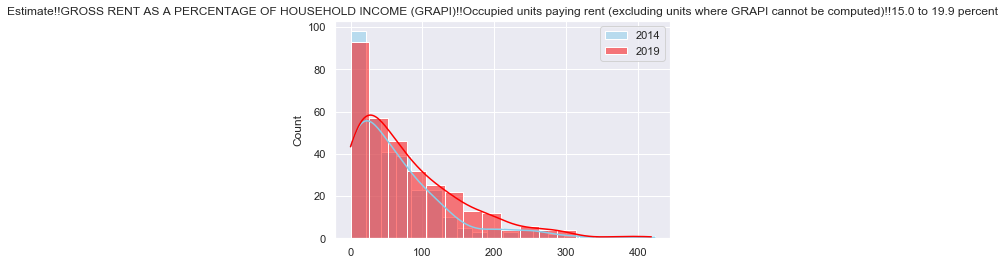

Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent
[[2014
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent'
  'DP04_0138E']
 [2019
  'Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!25.0 to 29.9 percent'
  'DP04_0140E']]


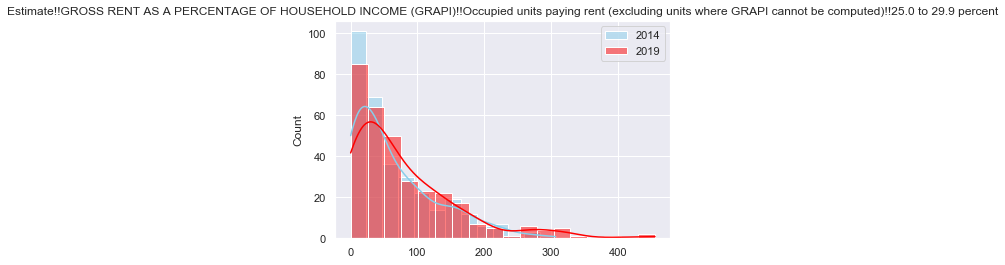

Estimate!!SEX AND AGE!!Total population!!Male
[[2014 'Estimate!!SEX AND AGE!!Total population!!Male' 'DP05_0002E']
 [2019 'Estimate!!SEX AND AGE!!Total population!!Male' 'DP05_0002E']]


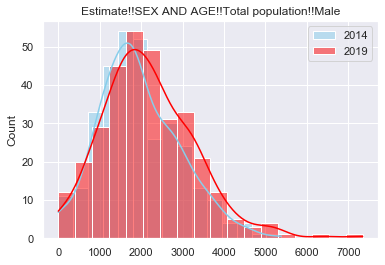

Estimate!!SEX AND AGE!!Total population!!Female
[[2014 'Estimate!!SEX AND AGE!!Total population!!Female' 'DP05_0003E']
 [2019 'Estimate!!SEX AND AGE!!Total population!!Female' 'DP05_0003E']]


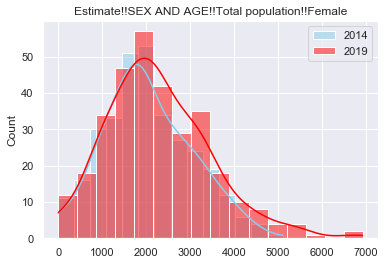

Estimate!!RACE!!Total population!!One race
[[2014 'Estimate!!RACE!!Total population!!One race' 'DP05_0029E']
 [2019 'Estimate!!RACE!!Total population!!One race' 'DP05_0036E']
 [2019 'Estimate!!RACE!!Total population!!One race' 'DP05_0034E']]


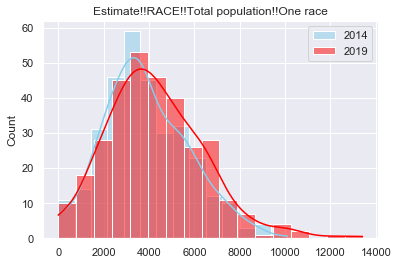

Estimate!!RACE!!Total population!!Two or more races
[[2014 'Estimate!!RACE!!Total population!!Two or more races' 'DP05_0030E']
 [2019 'Estimate!!RACE!!Total population!!Two or more races' 'DP05_0035E']
 [2019 'Estimate!!RACE!!Total population!!Two or more races' 'DP05_0058E']]


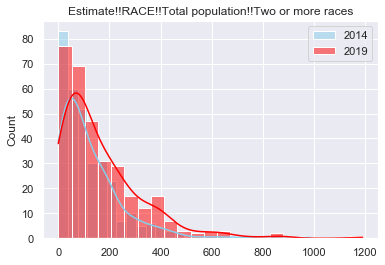

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)'
  'DP05_0066E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)'
  'DP05_0071E']]


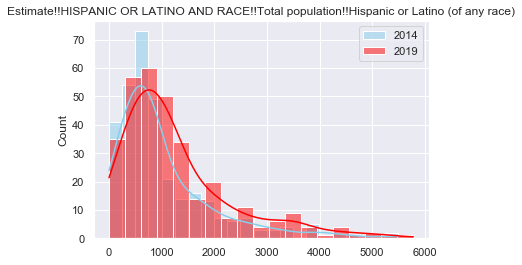

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican'
  'DP05_0068E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican'
  'DP05_0073E']]


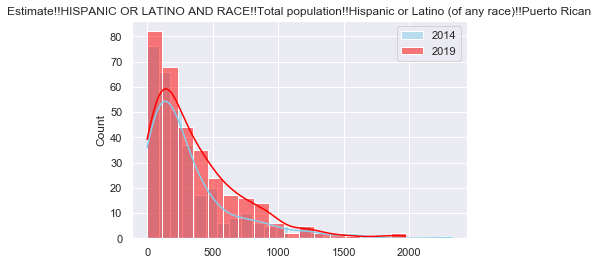

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban'
  'DP05_0069E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban'
  'DP05_0074E']]


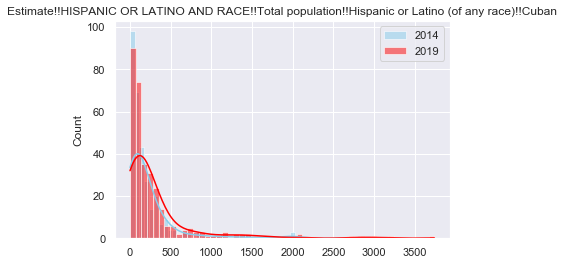

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino'
  'DP05_0070E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino'
  'DP05_0075E']]


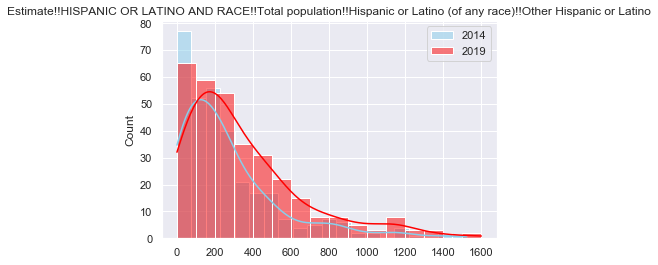

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races'
  'DP05_0078E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races'
  'DP05_0083E']]


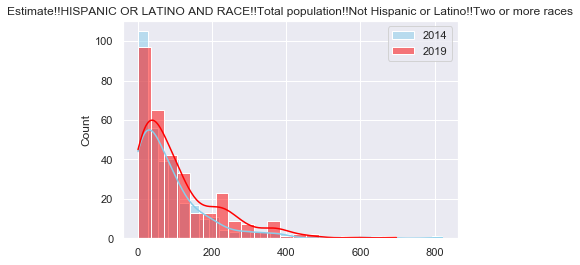

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race'
  'DP05_0079E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race'
  'DP05_0084E']]


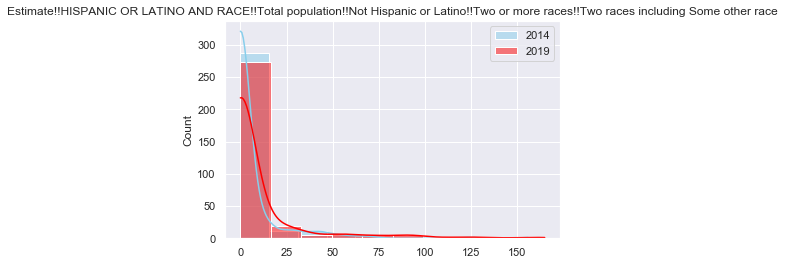

Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races
[[2014
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races'
  'DP05_0080E']
 [2019
  'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races'
  'DP05_0085E']]


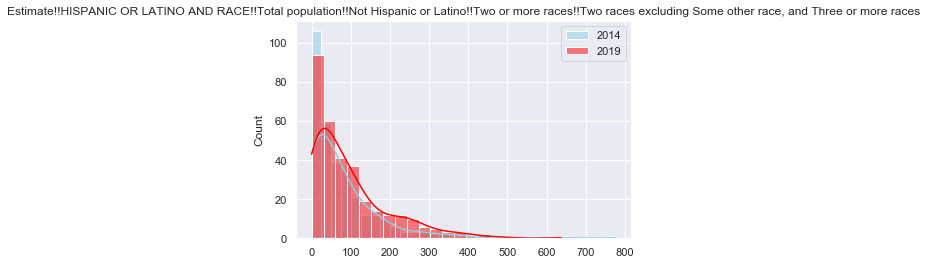

In [100]:
for code in statistically_signficant_codes:
    print(code)
    print(acs_dic[acs_dic.label==code][['acs_year', 'label', 'variable_code']].values)

    sns.set(style="darkgrid")

    sns.histplot(x=list(labled_codes_2014_df[code]), color="skyblue", label="2014", kde=True)
    sns.histplot(x=list(labled_codes_2019_df[code]), color="red", label="2019", kde=True)

    plt.legend() 
    plt.title(code)
    plt.show()